In [5]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from sklearn.preprocessing import LabelEncoder

In [6]:
# Loading the Dataset
file_path = "/content/drive/MyDrive/ER Wait Time Dataset.csv"
er_data = pd.read_csv(file_path)
er_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 19 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   Visit ID                            5000 non-null   object
 1   Patient ID                          5000 non-null   object
 2   Hospital ID                         5000 non-null   object
 3   Hospital Name                       5000 non-null   object
 4   Region                              5000 non-null   object
 5   Visit Date                          5000 non-null   object
 6   Day of Week                         5000 non-null   object
 7   Season                              5000 non-null   object
 8   Time of Day                         5000 non-null   object
 9   Urgency Level                       5000 non-null   object
 10  Nurse-to-Patient Ratio              5000 non-null   int64 
 11  Specialist Availability             5000 non-null   int6

In [7]:
# First five rows of the dataset
er_data.head()

,Visit ID,Patient ID,Hospital ID,Hospital Name,Region,Visit Date,Day of Week,Season,Time of Day,Urgency Level,Nurse-to-Patient Ratio,Specialist Availability,Facility Size (Beds),Time to Registration (min),Time to Triage (min),Time to Medical Professional (min),Total Wait Time (min),Patient Outcome,Patient Satisfaction
0,HOSP-1-20240210-0001,PAT-00001,HOSP-1,Springfield General Hospital,Urban,2024-02-10 20:20:56,Saturday,Winter,Late Morning,Medium,4,3,92,17,22,66,105,Discharged,1
1,HOSP-3-20241128-0001,PAT-00002,HOSP-3,Northside Community Hospital,Rural,2024-11-28 02:07:47,Thursday,Fall,Evening,Medium,4,0,38,9,30,30,69,Discharged,3
2,HOSP-3-20240930-0002,PAT-00003,HOSP-3,Northside Community Hospital,Rural,2024-09-30 04:02:28,Monday,Fall,Evening,Low,5,1,38,38,40,125,203,Discharged,1
3,HOSP-2-20240227-0001,PAT-00004,HOSP-2,Riverside Medical Center,Urban,2024-02-27 00:31:13,Tuesday,Winter,Evening,High,4,5,94,8,16,64,88,Discharged,2
4,HOSP-1-20240306-0002,PAT-00005,HOSP-1,Springfield General Hospital,Urban,2024-03-06 16:52:26,Wednesday,Spring,Afternoon,Low,4,8,74,26,29,63,118,Discharged,1


In [8]:
# Last five rows of the data
er_data.tail()

,Visit ID,Patient ID,Hospital ID,Hospital Name,Region,Visit Date,Day of Week,Season,Time of Day,Urgency Level,Nurse-to-Patient Ratio,Specialist Availability,Facility Size (Beds),Time to Registration (min),Time to Triage (min),Time to Medical Professional (min),Total Wait Time (min),Patient Outcome,Patient Satisfaction
4995,HOSP-5-20241212-0989,PAT-04996,HOSP-5,Summit Health Center,Urban,2024-12-12 04:29:36,Thursday,Winter,Evening,Critical,2,1,142,6,10,19,35,Discharged,3
4996,HOSP-4-20240630-0995,PAT-04997,HOSP-4,St. Mary’s Regional Health,Rural,2024-06-30 22:44:17,Sunday,Summer,Evening,Medium,4,0,19,7,23,40,70,Discharged,3
4997,HOSP-2-20240213-1022,PAT-04998,HOSP-2,Riverside Medical Center,Urban,2024-02-13 21:06:17,Tuesday,Winter,Afternoon,Medium,3,7,163,14,29,87,130,Discharged,1
4998,HOSP-2-20240828-1023,PAT-04999,HOSP-2,Riverside Medical Center,Urban,2024-08-28 03:11:51,Wednesday,Summer,Afternoon,Low,5,4,160,21,35,73,129,Left Without Being Seen,1
4999,HOSP-1-20240825-0994,PAT-05000,HOSP-1,Springfield General Hospital,Urban,2024-08-25 23:05:40,Sunday,Summer,Evening,Medium,4,6,176,20,22,77,119,Discharged,1


In [9]:
# Checking for null values
er_data.isnull().sum()

,0
Visit ID,0
Patient ID,0
Hospital ID,0
Hospital Name,0
Region,0
Visit Date,0
Day of Week,0
Season,0
Time of Day,0
Urgency Level,0


In [10]:
# Renaming to lowercase and space to '_' for easy usecase
er_data.columns = (
        er_data.columns.str.strip()       # Removing leading/trailing whitespace
                       .str.lower()       # Converting to lowercase
                       .str.replace(' ', '_')
    )

er_data.columns

Index(['visit_id', 'patient_id', 'hospital_id', 'hospital_name', 'region',
       'visit_date', 'day_of_week', 'season', 'time_of_day', 'urgency_level',
       'nurse-to-patient_ratio', 'specialist_availability',
       'facility_size_(beds)', 'time_to_registration_(min)',
       'time_to_triage_(min)', 'time_to_medical_professional_(min)',
       'total_wait_time_(min)', 'patient_outcome', 'patient_satisfaction'],
      dtype='object')

In [11]:
# Checking for typo error in names of hospital
er_data['hospital_name'].unique()

array(['Springfield General Hospital', 'Northside Community Hospital',
       'Riverside Medical Center', 'Summit Health Center',
       'St. Mary’s Regional Health'], dtype=object)

In [12]:
er_data.describe()

,nurse-to-patient_ratio,specialist_availability,facility_size_(beds),time_to_registration_(min),time_to_triage_(min),time_to_medical_professional_(min),total_wait_time_(min),patient_satisfaction
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,3.238200,3.875000,87.118800,11.704200,24.827000,45.385400,81.916600,2.771600
std,1.200895,3.043292,57.998585,10.437284,24.807994,35.619975,68.084538,1.424584
min,1.000000,0.000000,10.000000,0.000000,1.000000,2.000000,4.000000,1.000000
25%,3.000000,1.000000,36.000000,3.000000,6.000000,17.000000,27.000000,1.000000
50%,3.000000,3.000000,74.000000,8.000000,16.000000,35.000000,60.000000,3.000000
75%,4.000000,6.000000,138.000000,18.000000,36.000000,66.000000,122.000000,4.000000
max,5.000000,10.000000,200.000000,66.000000,163.000000,233.000000,442.000000,5.000000


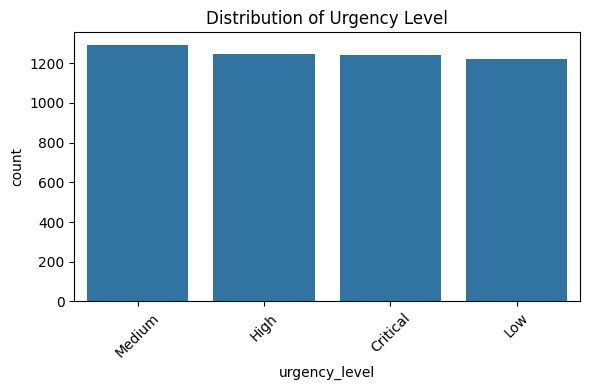

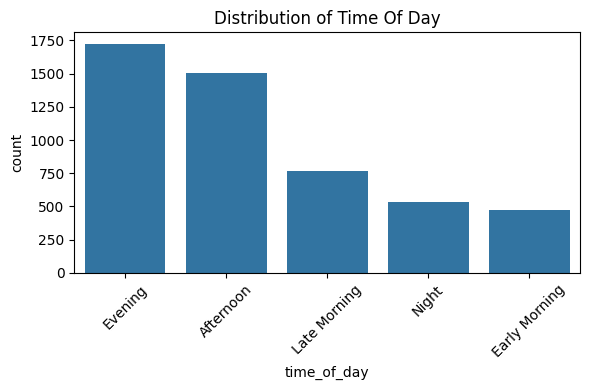

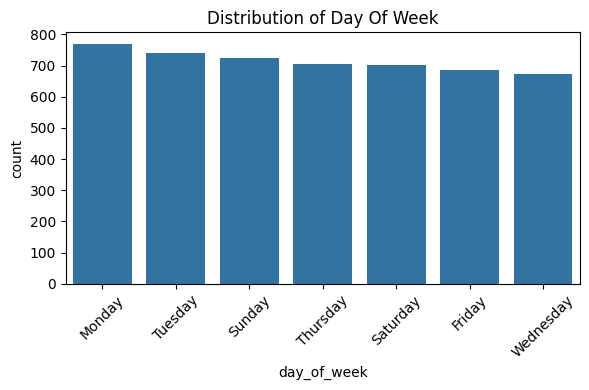

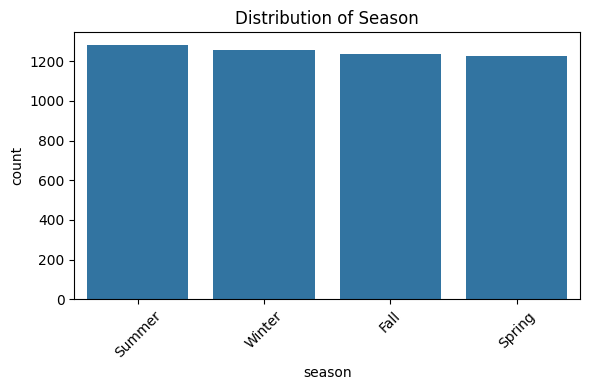

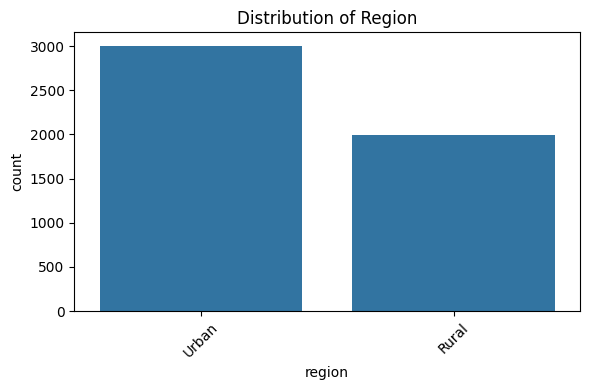

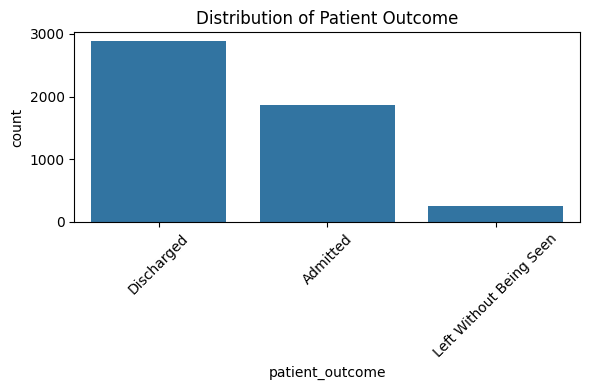

In [13]:
categorical_cols = ['urgency_level', 'time_of_day', 'day_of_week', 'season', 'region', 'patient_outcome']
for col in categorical_cols:
    plt.figure(figsize=(6, 4))
    sns.countplot(data=er_data, x=col, order=er_data[col].value_counts().index)
    plt.title(f'Distribution of {col.replace("_", " ").title()}')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

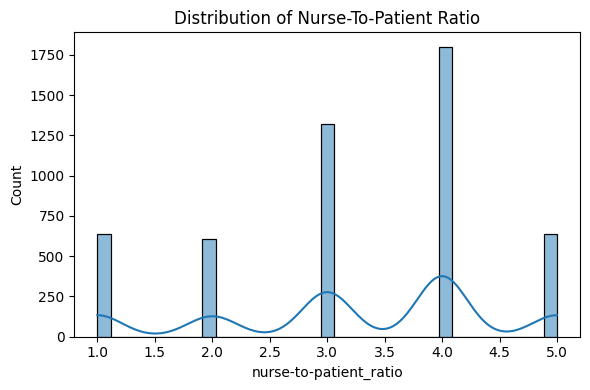

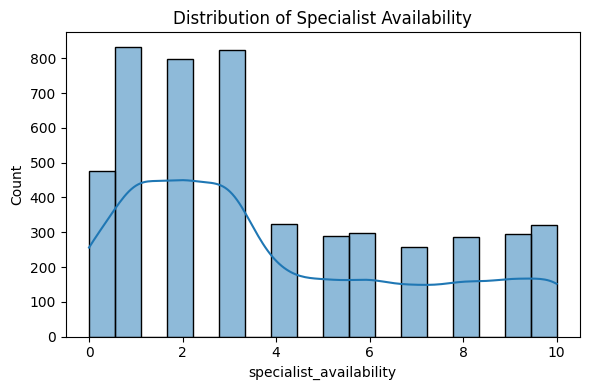

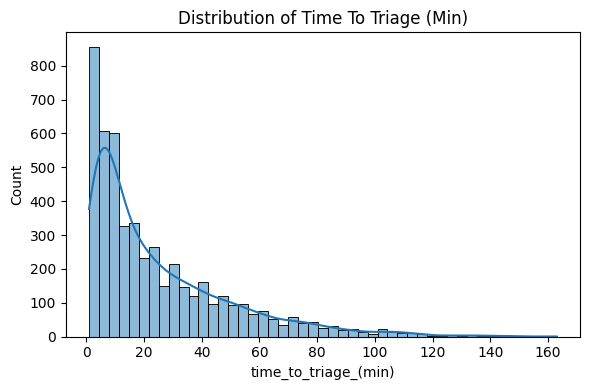

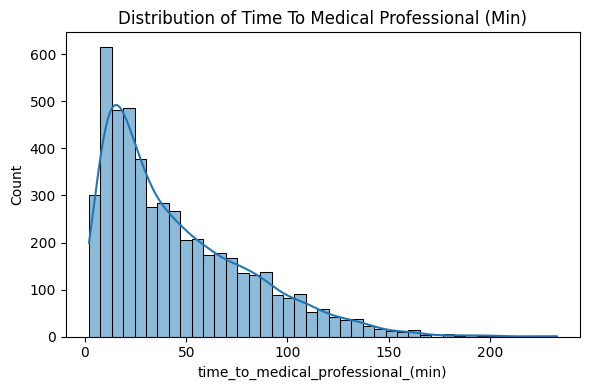

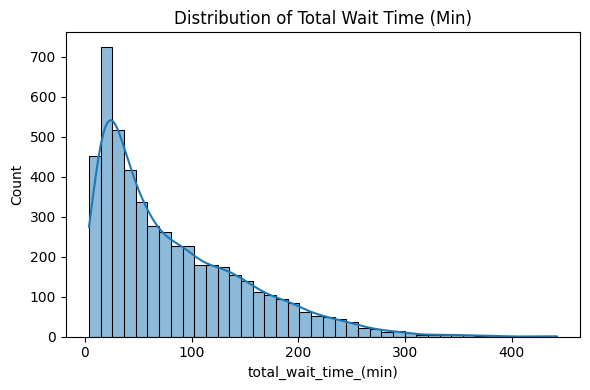

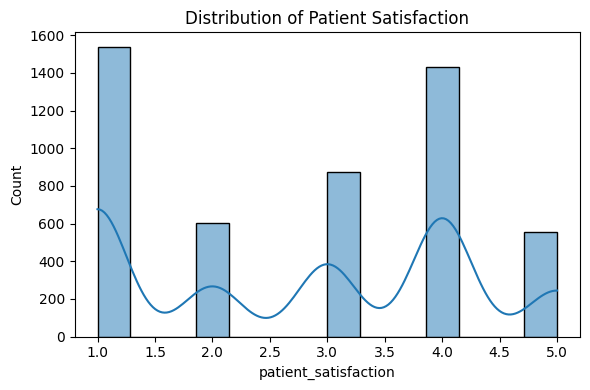

In [14]:
numerical_cols = ['nurse-to-patient_ratio', 'specialist_availability', 'time_to_triage_(min)',
                  'time_to_medical_professional_(min)', 'total_wait_time_(min)', 'patient_satisfaction']

for col in numerical_cols:
    plt.figure(figsize=(6, 4))
    sns.histplot(data = er_data, x=col, kde=True)
    plt.title(f'Distribution of {col.replace("_", " ").title()}')
    plt.tight_layout()
    plt.show()

In [15]:
# Feature Engineering
er_data['visit_date'] = pd.to_datetime(er_data['visit_date'])
er_data['hour'] = er_data['visit_date'].dt.hour
er_data['day_of_week'] = er_data['visit_date'].dt.day_name()
er_data['month'] = er_data['visit_date'].dt.month

for col in categorical_cols:
    le = LabelEncoder()
    er_data[col + '_encoded'] = le.fit_transform(er_data[col])

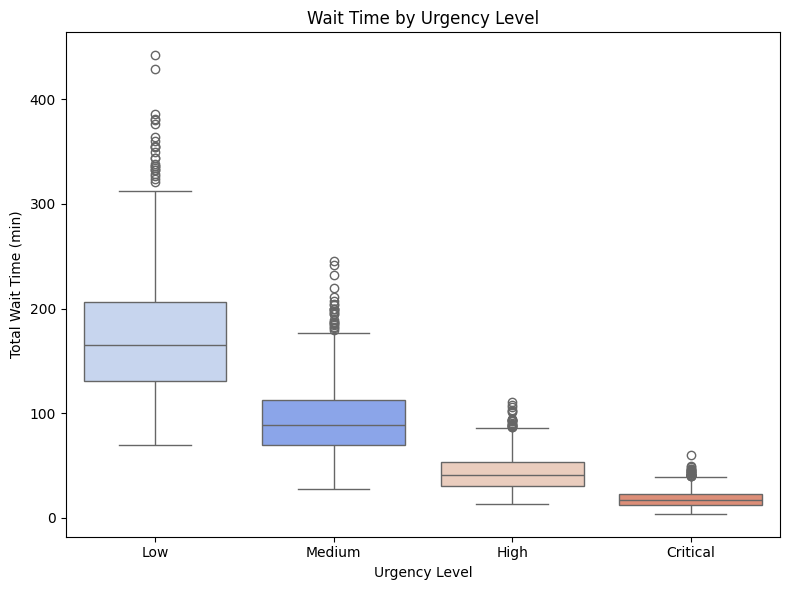

In [16]:
# Boxplot - Wait Time by Urgency Level
urgency_order = ['Low', 'Medium', 'High', 'Critical']
plt.figure(figsize=(8, 6))
sns.boxplot(data=er_data, x='urgency_level', y='total_wait_time_(min)',
            hue='urgency_level', palette='coolwarm',
            legend=False, order = urgency_order)
plt.title('Wait Time by Urgency Level')
plt.ylabel('Total Wait Time (min)')
plt.xlabel('Urgency Level')
plt.tight_layout()
plt.show()

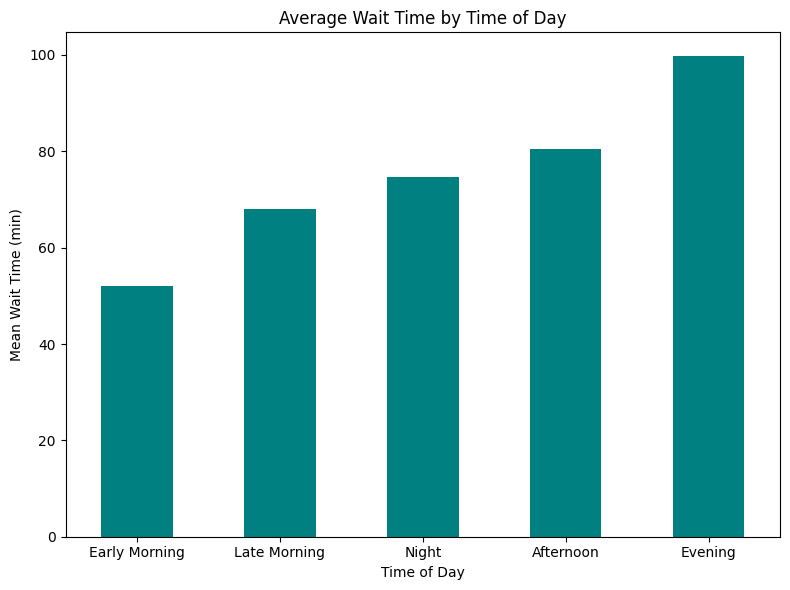

In [17]:
 # Bar Chart - Average Wait Time by Time of Day
plt.figure(figsize=(8, 6))
avg_by_time = er_data.groupby('time_of_day')['total_wait_time_(min)'].mean().sort_values()
avg_by_time.plot(kind='bar', color='teal')
plt.title('Average Wait Time by Time of Day')
plt.ylabel('Mean Wait Time (min)')
plt.xlabel('Time of Day')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

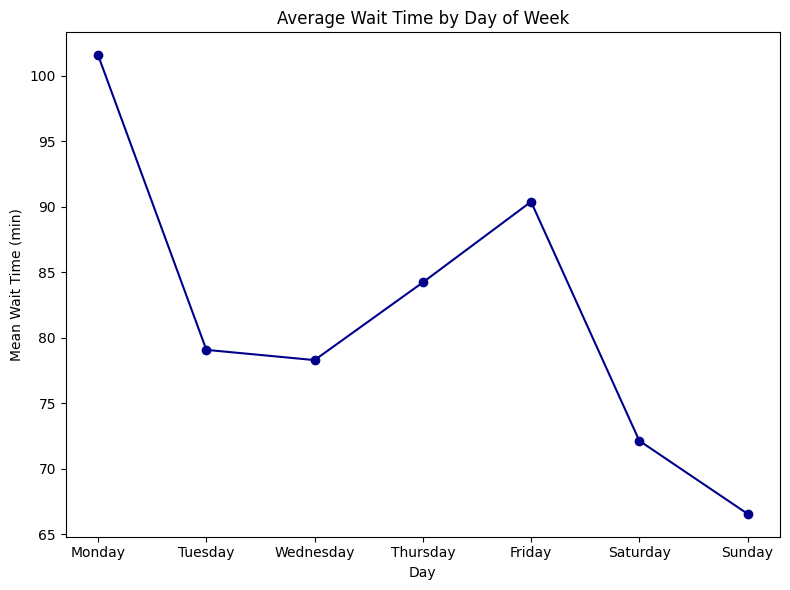

In [18]:
# Line Chart - Wait Time by Day of Week
plt.figure(figsize=(8, 6))
dow_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday',
             'Sunday']
avg_by_day = er_data.groupby('day_of_week')['total_wait_time_(min)'].mean().reindex(dow_order)
avg_by_day.plot(marker='o', color='darkblue')
plt.title('Average Wait Time by Day of Week')
plt.ylabel('Mean Wait Time (min)')
plt.xlabel('Day')
plt.tight_layout()
plt.show()

<Figure size 1000x600 with 0 Axes>

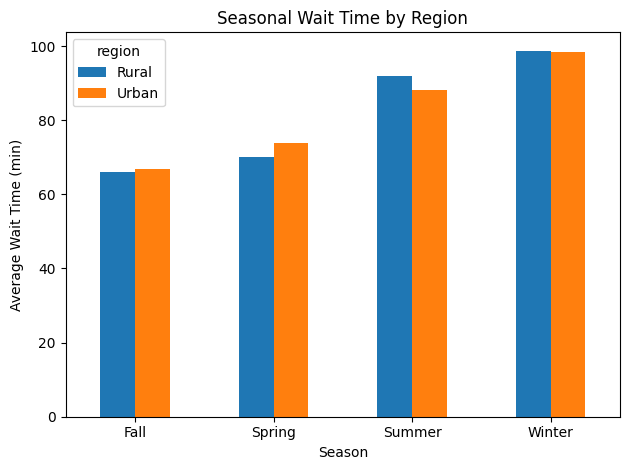

In [19]:
# Grouped Bar - Seasonal Wait Time by Region
plt.figure(figsize=(10, 6))
season_region = er_data.groupby(['season', 'region'])['total_wait_time_(min)'].mean().unstack()
season_region.plot(kind='bar')
plt.title('Seasonal Wait Time by Region')
plt.ylabel('Average Wait Time (min)')
plt.xlabel('Season')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

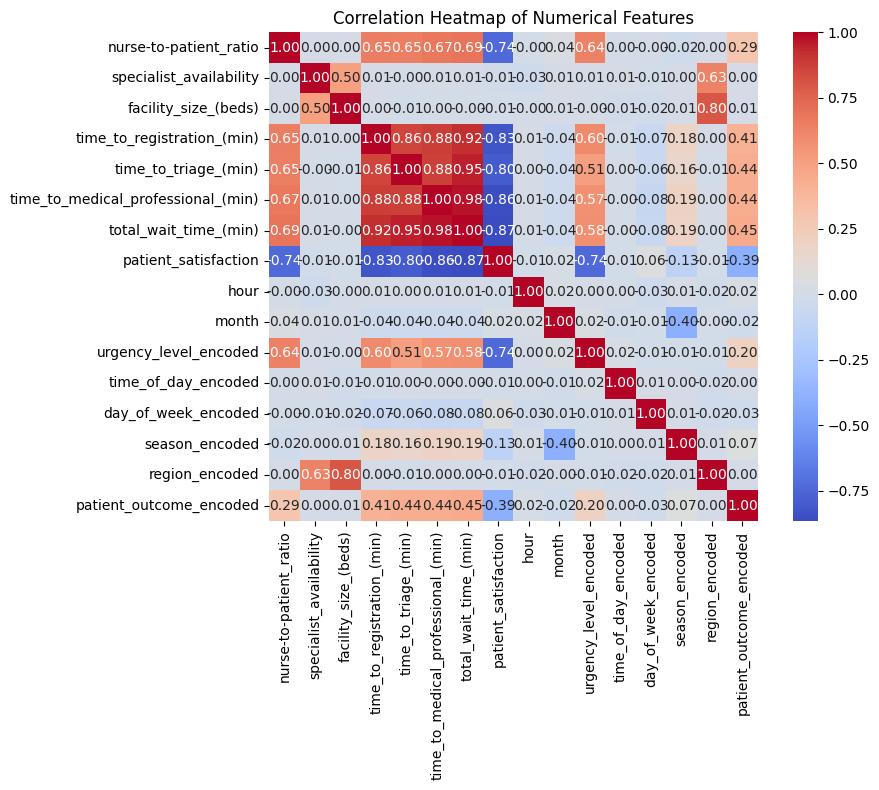

In [20]:
# Correlation Heatmap
plt.figure(figsize=(10, 8))
num_corr = er_data.select_dtypes(include='number').corr()
sns.heatmap(num_corr, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title('Correlation Heatmap of Numerical Features')
plt.tight_layout()
plt.show()

<Axes: xlabel='nurse-to-patient_ratio', ylabel='total_wait_time_(min)'>

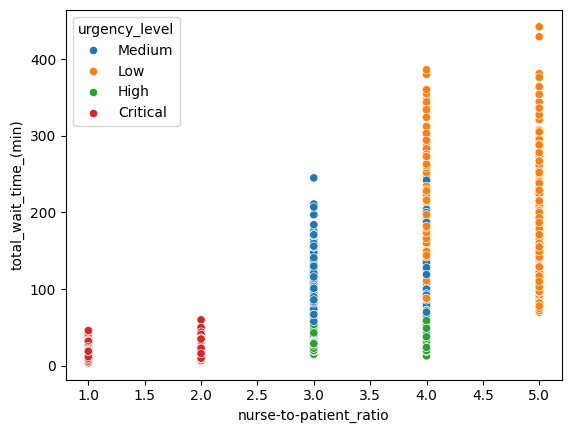

In [21]:
sns.scatterplot(data=er_data, x='nurse-to-patient_ratio', y='total_wait_time_(min)', hue='urgency_level')


In [22]:
er_data.head()

,visit_id,patient_id,hospital_id,hospital_name,region,visit_date,day_of_week,season,time_of_day,urgency_level,...,patient_outcome,patient_satisfaction,hour,month,urgency_level_encoded,time_of_day_encoded,day_of_week_encoded,season_encoded,region_encoded,patient_outcome_encoded
0,HOSP-1-20240210-0001,PAT-00001,HOSP-1,Springfield General Hospital,Urban,2024-02-10 20:20:56,Saturday,Winter,Late Morning,Medium,...,Discharged,1,20,2,3,3,2,3,1,1
1,HOSP-3-20241128-0001,PAT-00002,HOSP-3,Northside Community Hospital,Rural,2024-11-28 02:07:47,Thursday,Fall,Evening,Medium,...,Discharged,3,2,11,3,2,4,0,0,1
2,HOSP-3-20240930-0002,PAT-00003,HOSP-3,Northside Community Hospital,Rural,2024-09-30 04:02:28,Monday,Fall,Evening,Low,...,Discharged,1,4,9,2,2,1,0,0,1
3,HOSP-2-20240227-0001,PAT-00004,HOSP-2,Riverside Medical Center,Urban,2024-02-27 00:31:13,Tuesday,Winter,Evening,High,...,Discharged,2,0,2,1,2,5,3,1,1
4,HOSP-1-20240306-0002,PAT-00005,HOSP-1,Springfield General Hospital,Urban,2024-03-06 16:52:26,Wednesday,Spring,Afternoon,Low,...,Discharged,1,16,3,2,0,6,1,1,1
